In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv", delimiter=',')


In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#total bedrooms has some missing values so we remove the rows with missing values
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
#axis 0 is for operations along the rows and axis 1 is for operations along the columns
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
 x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
train_data = x_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14751,-117.06,32.57,17.0,2252.0,378.0,1776.0,365.0,4.6364,NEAR OCEAN,141100.0
14776,-117.08,32.58,22.0,2128.0,477.0,1420.0,450.0,3.2687,NEAR OCEAN,131000.0
14710,-117.07,32.78,26.0,3725.0,623.0,1516.0,627.0,4.7143,NEAR OCEAN,268300.0
13422,-117.46,34.04,3.0,12870.0,2315.0,5820.0,1759.0,4.2429,INLAND,147300.0
3002,-119.01,35.32,23.0,4870.0,965.0,2717.0,928.0,2.5960,INLAND,70000.0
...,...,...,...,...,...,...,...,...,...,...
13630,-117.33,34.08,37.0,2267.0,405.0,1175.0,403.0,3.7500,INLAND,95200.0
9980,-122.26,38.57,22.0,509.0,103.0,139.0,73.0,2.1979,INLAND,152800.0
20129,-118.93,34.40,17.0,3275.0,599.0,2422.0,637.0,3.7092,<1H OCEAN,190500.0
6207,-117.90,34.06,33.0,1701.0,290.0,831.0,275.0,5.4469,<1H OCEAN,274700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

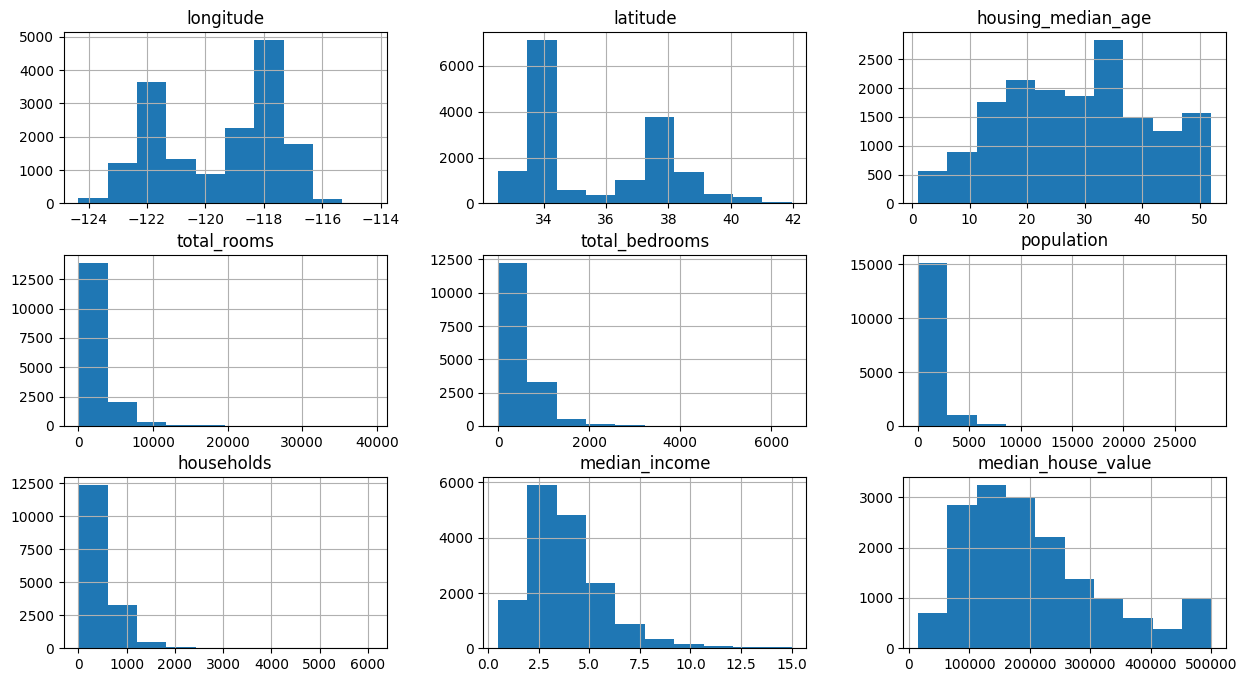

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
train_corr = train_data.select_dtypes(include='number').corr()

<Axes: >

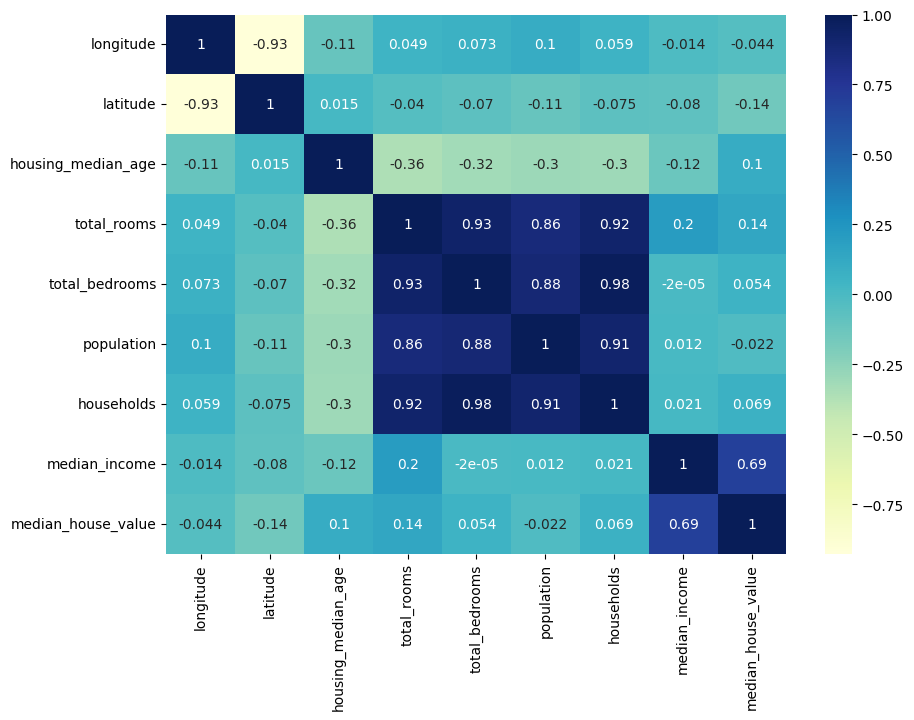

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(train_corr, annot=True, cmap="YlGnBu") 

In [16]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14751,-117.06,32.57,17.0,2252.0,378.0,1776.0,365.0,4.6364,NEAR OCEAN,141100.0
14776,-117.08,32.58,22.0,2128.0,477.0,1420.0,450.0,3.2687,NEAR OCEAN,131000.0
14710,-117.07,32.78,26.0,3725.0,623.0,1516.0,627.0,4.7143,NEAR OCEAN,268300.0
13422,-117.46,34.04,3.0,12870.0,2315.0,5820.0,1759.0,4.2429,INLAND,147300.0
3002,-119.01,35.32,23.0,4870.0,965.0,2717.0,928.0,2.5960,INLAND,70000.0
...,...,...,...,...,...,...,...,...,...,...
13630,-117.33,34.08,37.0,2267.0,405.0,1175.0,403.0,3.7500,INLAND,95200.0
9980,-122.26,38.57,22.0,509.0,103.0,139.0,73.0,2.1979,INLAND,152800.0
20129,-118.93,34.40,17.0,3275.0,599.0,2422.0,637.0,3.7092,<1H OCEAN,190500.0
6207,-117.90,34.06,33.0,1701.0,290.0,831.0,275.0,5.4469,<1H OCEAN,274700.0


In [17]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

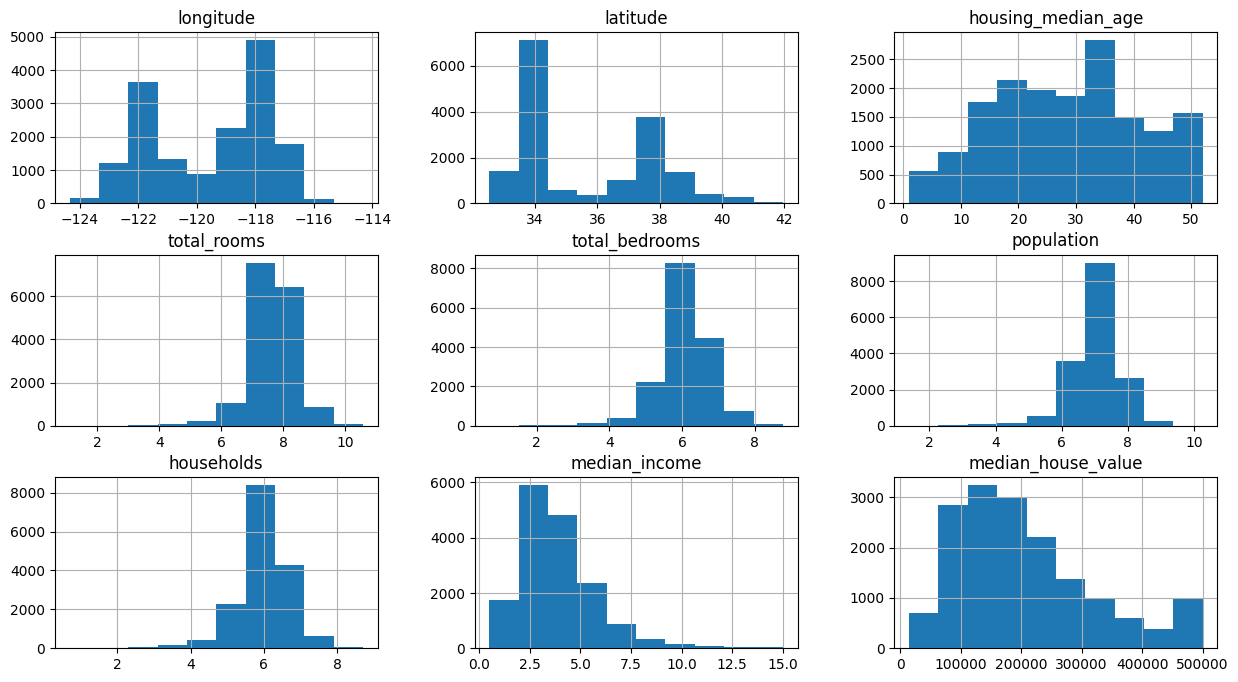

In [18]:
train_data.hist(figsize=(15,8))

In [19]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7240
INLAND        5150
NEAR OCEAN    2130
NEAR BAY      1823
ISLAND           3
Name: count, dtype: int64

In [20]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

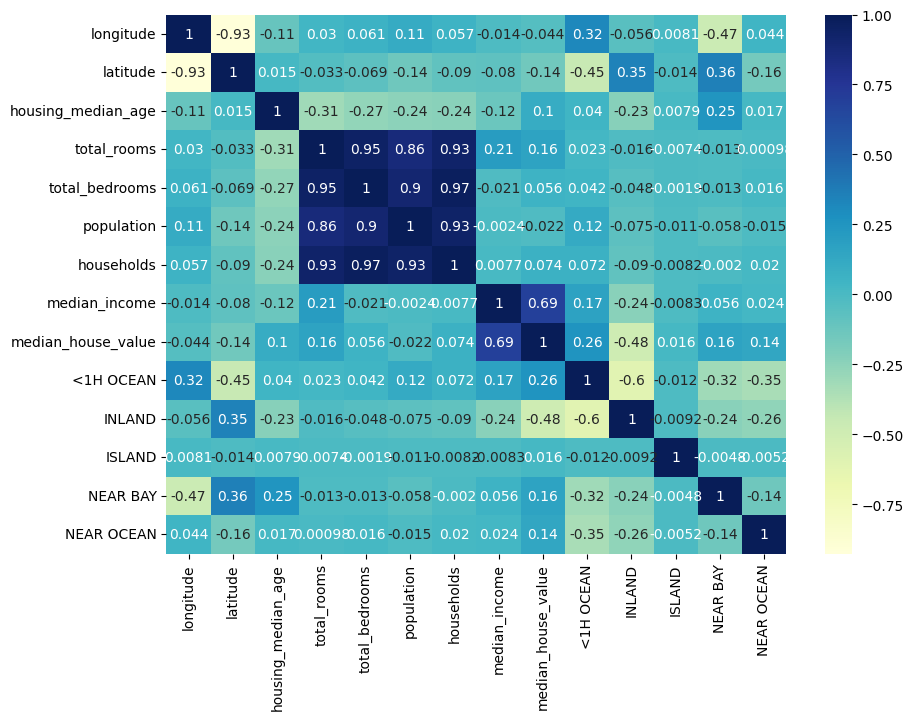

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") 

In [22]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

<Axes: xlabel='latitude', ylabel='longitude'>

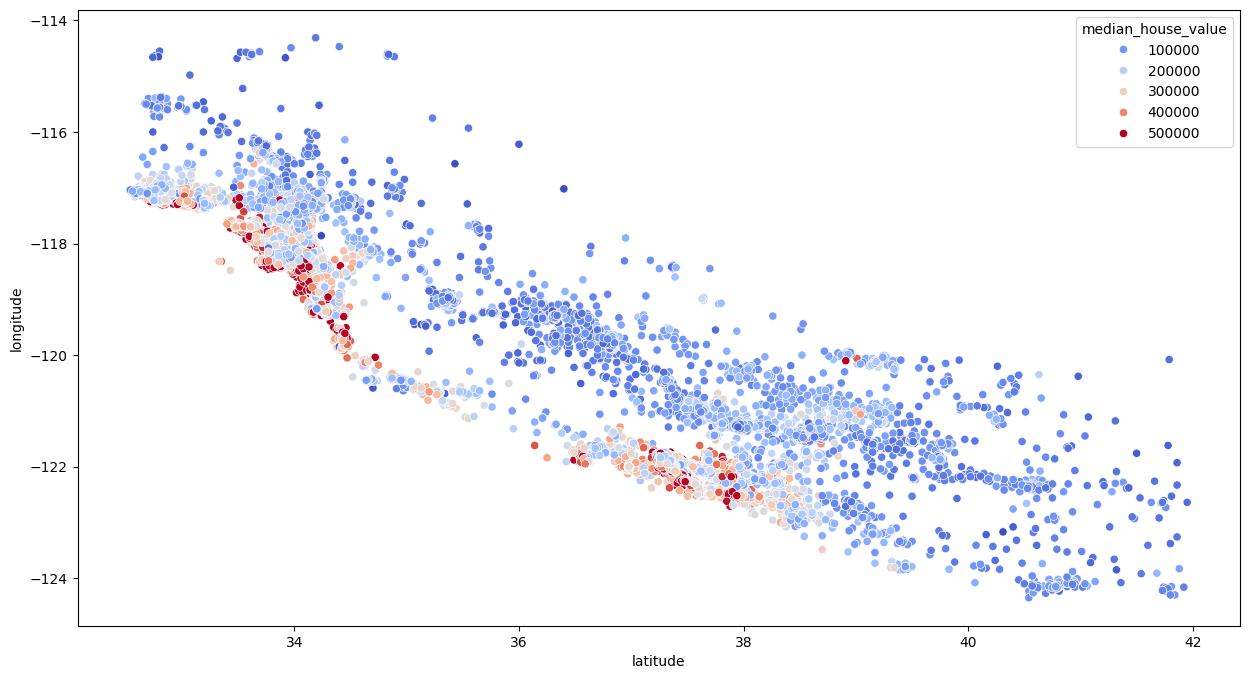

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [24]:
# the above scatter graph shows that the houses near ocean are more expensive than inland houses.

In [25]:
train_data['bedroom_to_room_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_to_room_ratio'] = train_data['total_rooms']/train_data['households']

<Axes: >

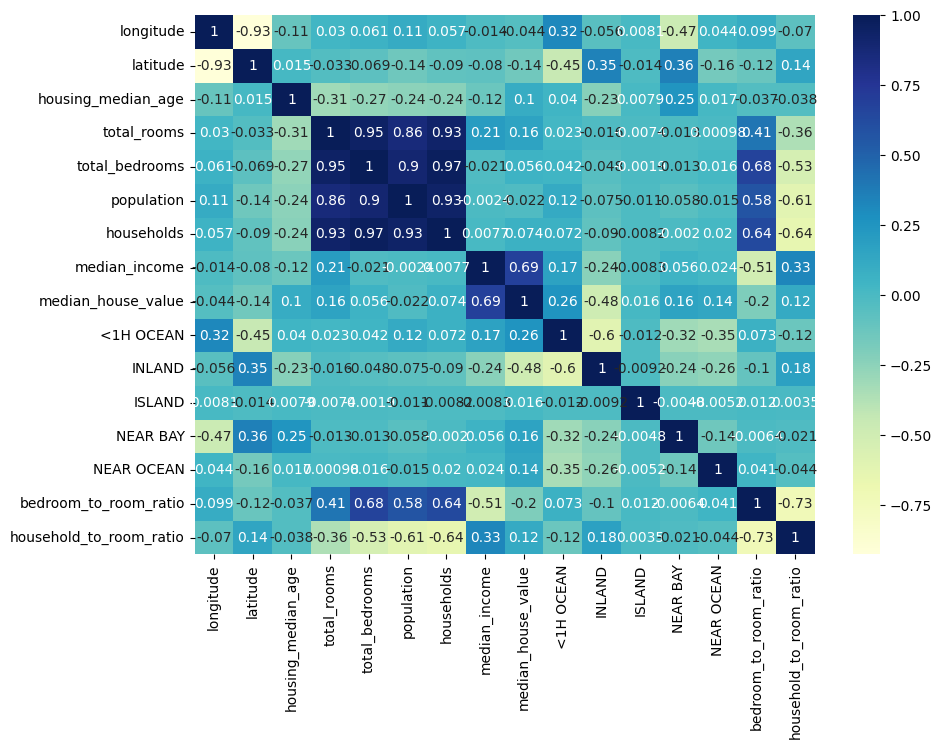

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") 

In [27]:
train_data['bedroom_to_household_ratio'] = train_data['total_bedrooms']/train_data['households']

<Axes: >

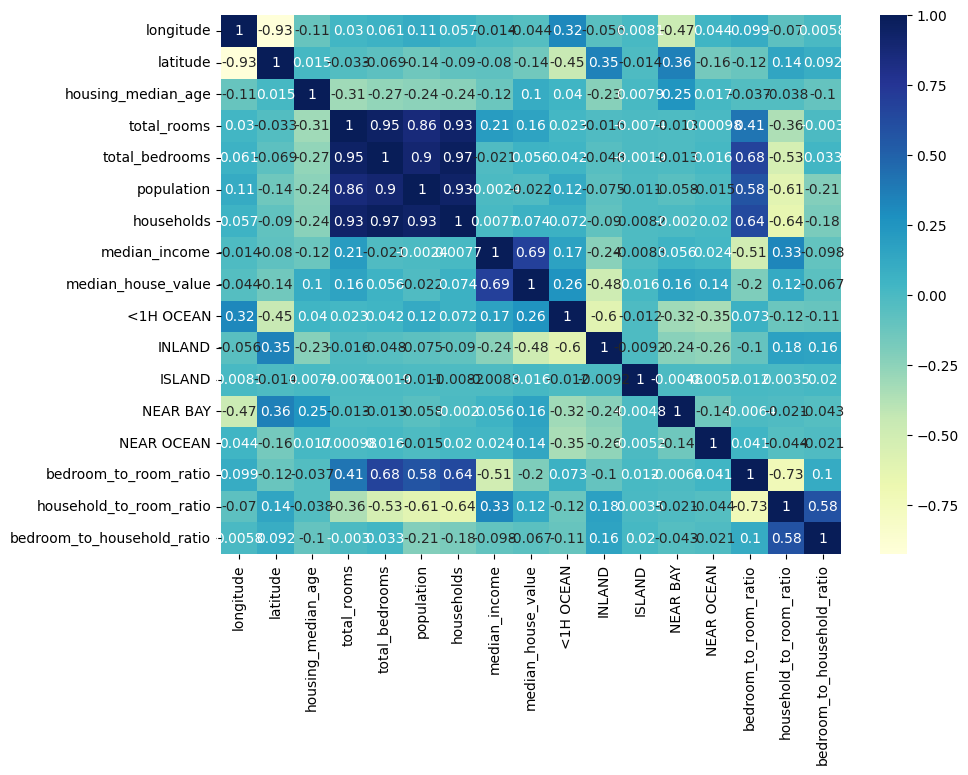

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") 

In [29]:
from sklearn.linear_model import LinearRegression
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg = LinearRegression() #create an instance of linear regression class of scikit learn lib and assign to reg var
reg.fit(x_train, y_train) #x_train taken as features (inputs) and y_train taken as target(output ) of the model.

LinearRegression()

In [30]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_to_room_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_to_room_ratio'] = test_data['total_rooms']/test_data['households']
test_data['bedroom_to_household_ratio'] = test_data['total_bedrooms']/test_data['households']


In [31]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [34]:
reg.score(x_test, y_test)

0.6577804374719729

In [35]:
# lets improve the accuracy by removing irrelavant features

In [41]:
x_test, x_train = test_data.drop(['longitude', 'latitude'], axis=1), train_data.drop(['longitude', 'latitude'], axis=1)

In [43]:
newreg = LinearRegression() 
newreg.fit(x_train, y_train)
newreg.score(x_test, y_test)

1.0